In [2]:
library(rstan)
library(bayesplot)
rstan_options(auto_write = TRUE)
options(mc.cores = parallel::detectCores())

Loading required package: ggplot2
Loading required package: StanHeaders
rstan (Version 2.16.2, packaged: 2017-07-03 09:24:58 UTC, GitRev: 2e1f913d3ca3)
For execution on a local, multicore CPU with excess RAM we recommend calling
rstan_options(auto_write = TRUE)
options(mc.cores = parallel::detectCores())
This is bayesplot version 1.3.0
Plotting theme set to bayesplot::theme_default()


In [3]:
source("load_data.R")
patient_data <- load_patient_data()


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Parsed with column specification:
cols(
  `Genentech Pt ID` = col_integer(),
  `Sample ID` = col_character()
)
Parsed with column specification:
cols(
  `MGI DNA Name` = col_character(),
  `BAM Name` = col_character()
)
Parsed with column specification:
cols(
  `Individual Name` = col_integer(),
  `Sample Name` = col_character(),
  `DNA Type` = col_character(),
  `Tissue Name` = col_character(),
  `Common Name` = col_character(),
  `MGI DNA Name` = col_character(),
  `Sequence Plan` = col_character(),
  Status = col_character()
)
Parsed with column specification:
cols(
  `Subject ID` = col_character(),
  `Sample ID` = col_character(),
  Product = col_character(),
  `Sample Type` = col_character(),
  `Time Point` = col_character(),
  `Clinical Response` = col_character(),
  `Cell count` = col

In [18]:
til_data <- patient_data %>% filter(!is.na(TIL)) %>% select(TIL, PFS)

input_data = list(
    N = til_data %>% nrow,
    TIL = til_data %>% pull(TIL),
    PFS = til_data %>% pull(PFS))

fit <- stan(file = "TIL_linear_regression.stan", data = input_data,
            iter = 11000, warmup = 1000, chains = 4, seed = 194838)

hash mismatch so recompiling; make sure Stan code ends with a blank line


In file included from filebb374b2e6c4f.cpp:8:
In file included from /usr/local/lib/R/3.4/site-library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /usr/local/lib/R/3.4/site-library/StanHeaders/include/stan/math.hpp:4:
In file included from /usr/local/lib/R/3.4/site-library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /usr/local/lib/R/3.4/site-library/StanHeaders/include/stan/math/rev/core.hpp:12:
In file included from /usr/local/lib/R/3.4/site-library/StanHeaders/include/stan/math/rev/core/gevv_vvv_vari.hpp:5:
In file included from /usr/local/lib/R/3.4/site-library/StanHeaders/include/stan/math/rev/core/var.hpp:7:
In file included from /usr/local/lib/R/3.4/site-library/BH/include/boost/math/tools/config.hpp:13:
In file included from /usr/local/lib/R/3.4/site-library/BH/include/boost/config.hpp:39:
/usr/local/lib/R/3.4/site-library/BH/include/boost/config/compiler/clang.hpp:196:11: warning: 'BOOST_NO_CXX11_RVALUE_REFERENCES' macro re

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


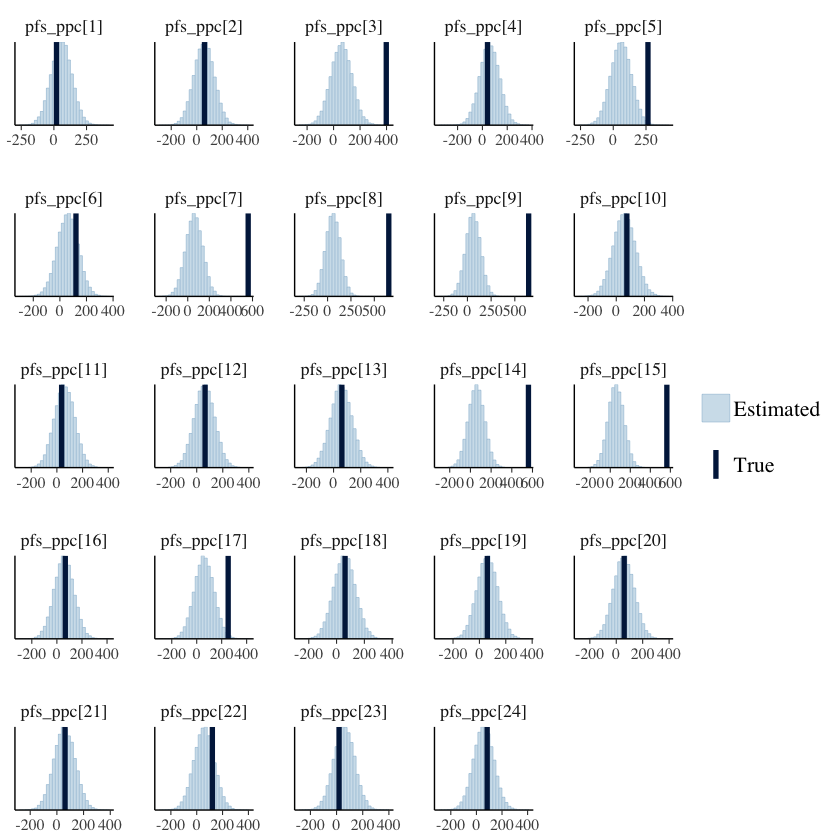

In [19]:
y_ppc <- as.matrix(fit, pars = "pfs_ppc")
mcmc_recover_hist(
    y_ppc,
    true = input_data[["PFS"]])

In [44]:
dcb_data <- patient_data %>% filter(!is.na(TIL)) %>% select(TIL, DCB) %>% mutate(DCB = as.integer(DCB))

input_data = list(
    N = dcb_data %>% nrow,
    TIL = dcb_data %>% pull(TIL),
    DCB = dcb_data %>% pull(DCB))

fit2 <- stan(file = "TIL_on_DCB_logistic_regression.stan", data = input_data,
            iter = 11000, warmup = 1000, chains = 4, seed = 194838)

hash mismatch so recompiling; make sure Stan code ends with a blank line


In file included from filebb377af8a830.cpp:8:
In file included from /usr/local/lib/R/3.4/site-library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /usr/local/lib/R/3.4/site-library/StanHeaders/include/stan/math.hpp:4:
In file included from /usr/local/lib/R/3.4/site-library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /usr/local/lib/R/3.4/site-library/StanHeaders/include/stan/math/rev/core.hpp:12:
In file included from /usr/local/lib/R/3.4/site-library/StanHeaders/include/stan/math/rev/core/gevv_vvv_vari.hpp:5:
In file included from /usr/local/lib/R/3.4/site-library/StanHeaders/include/stan/math/rev/core/var.hpp:7:
In file included from /usr/local/lib/R/3.4/site-library/BH/include/boost/math/tools/config.hpp:13:
In file included from /usr/local/lib/R/3.4/site-library/BH/include/boost/config.hpp:39:
/usr/local/lib/R/3.4/site-library/BH/include/boost/config/compiler/clang.hpp:196:11: warning: 'BOOST_NO_CXX11_RVALUE_REFERENCES' macro re

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


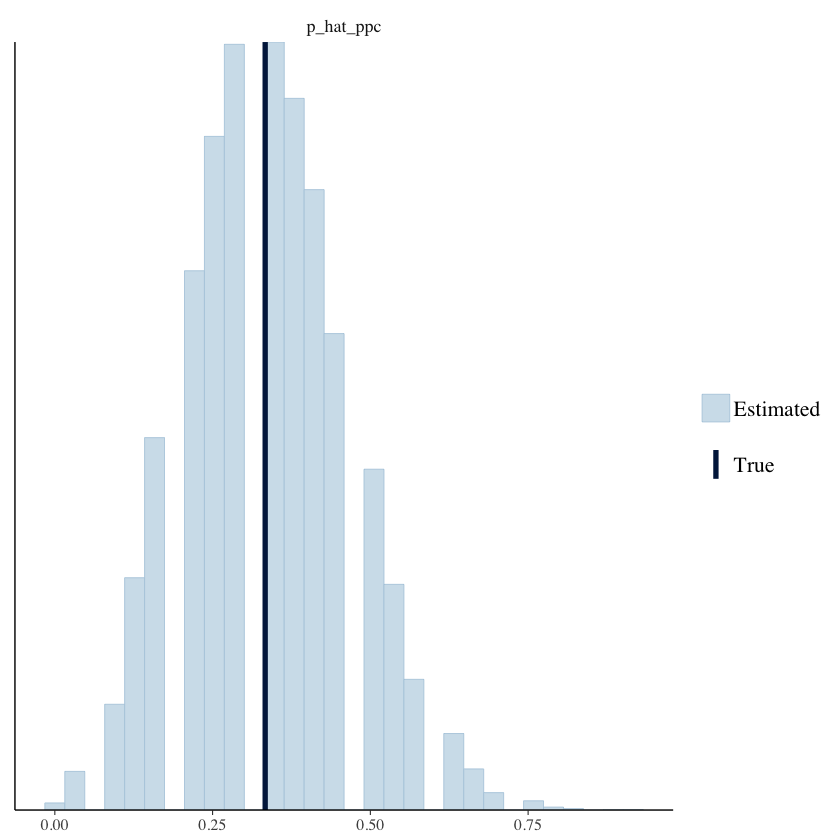

In [45]:
p_hat_ppc <- as.matrix(fit2, pars = "p_hat_ppc")
mcmc_recover_hist(
    p_hat_ppc,
    true = mean(input_data[["DCB"]]))

In [46]:
summary(fit2)

,mean,se_mean,sd,2.5%,25%,50%,75%,97.5%,n_eff,Rhat
beta,6.2076500,0.0329129516,3.6514749,-0.8515233,3.701888,6.1580783,8.6805348,13.3535735,12308.44,1.000412
alpha,-1.4772979,0.0057497192,0.6448001,-2.7939459,-1.900987,-1.4570180,-1.0368419,-0.2826687,12576.42,1.000467
p_hat_ppc,0.3366125,0.0007013149,0.1288177,0.1250000,0.250000,0.3333333,0.4166667,0.5833333,33738.44,1.000105
lp__,-14.8660681,0.0083364745,1.0241403,-17.6044422,-15.252164,-14.5582142,-14.1414389,-13.8685002,15092.25,1.000193
